In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line


In [1]:
aisles = pd.read_csv('Data/aisles.csv')
departments = pd.read_csv('Data/departments.csv')
order_products_prior = pd.read_csv('Data/order_products__prior.csv')
order_products_train = pd.read_csv('Data/order_products__train.csv')
orders = pd.read_csv('Data/orders.csv')
products = pd.read_csv('Data/products.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
 def merge(aisles,departments,products,order_products_prior,order_train,orders):
    orders_full = pd.concat([order_products_prior,order_train],axis = 0)
    df1 = pd.merge(products,departments, on = 'department_id')
    df2 = pd.merge(df1,aisles, on = 'aisle_id')
    df3 = pd.merge(orders_full,orders,on = 'order_id')
    final = pd.merge(df2,df3,on = 'product_id' )
    final['days_since_prior_order'].fillna(0,inplace = True)
    return final


In [10]:
grocery = merge(aisles,departments,products,order_products_prior,order_products_train,orders)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
columns_needed = ['order_id','product_id','add_to_cart_order','reordered','aisle_id','department_id','aisle','department','user_id']
full_orders = grocery[columns_needed]

In [12]:
ai = full_orders[['user_id','add_to_cart_order','aisle']].groupby(['user_id','aisle']).sum().reset_index()
de = full_orders[['user_id','add_to_cart_order','department']].groupby(['user_id','department']).sum().reset_index()
volume = ai.groupby('user_id')['add_to_cart_order'].sum().reset_index().rename(columns = {'add_to_cart_order':'volume'})

In [13]:
ai = ai.merge(volume,how = 'inner',on = 'user_id')
de = de.merge(volume,how = 'inner',on = 'user_id')
ai['aisle_shares'] = ai['add_to_cart_order']/ai['volume']
de['department_shares'] = de['add_to_cart_order']/de['volume']

In [14]:
ai_vol_pivot = ai[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id',columns = 'aisle',values = 'add_to_cart_order')
ai_sh_pivot = ai[['user_id','aisle','aisle_shares']].pivot(index = 'user_id',columns = 'aisle',values = 'aisle_shares')
de_vol_pivot = de[['user_id','department','add_to_cart_order']].pivot(index = 'user_id',columns = 'department',values = 'add_to_cart_order')
de_sh_pivot = de[['user_id','department','department_shares']].pivot(index = 'user_id',columns = 'department',values = 'department_shares')


In [15]:
ai_vol_pivot = ai_vol_pivot.fillna(value = 0)
ai_sh_pivot = ai_sh_pivot.fillna(value = 0)
de_vol_pivot = de_vol_pivot.fillna(value = 0)
de_sh_pivot = de_sh_pivot.fillna(value = 0)

In [16]:
full_orders

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,user_id
0,1107,1,7,0,61,19,cookies cakes,snacks,38259
1,5319,1,3,1,61,19,cookies cakes,snacks,196224
2,7540,1,4,1,61,19,cookies cakes,snacks,138499
3,9228,1,2,0,61,19,cookies cakes,snacks,79603
4,9273,1,30,0,61,19,cookies cakes,snacks,50005
...,...,...,...,...,...,...,...,...,...
33819101,3174062,48778,10,0,18,10,bulk dried fruits vegetables,bulk,23556
33819102,3220368,48778,16,0,18,10,bulk dried fruits vegetables,bulk,172793
33819103,3262111,48778,13,1,18,10,bulk dried fruits vegetables,bulk,10651
33819104,79093,48778,9,0,18,10,bulk dried fruits vegetables,bulk,55873


In [17]:
ai_sh_pivot

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.017857,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.025000
2,0.00000,0.010628,0.000000,0.0,0.000000,0.0,0.004159,0.00000,0.0,0.0,...,0.023105,0.003235,0.006932,0.000000,0.00000,0.000000,0.0,0.008318,0.0,0.186229
3,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.038363,0.012788,0.000000,0.000000,0.00000,0.000000,0.0,0.028133,0.0,0.000000
4,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.060000,0.00000,0.000000,0.0,0.040000,0.0,0.000000
5,0.02008,0.076305,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.064257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.00000,0.000000,0.009828,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.228501
206206,0.00000,0.021958,0.000000,0.0,0.000000,0.0,0.012809,0.00183,0.0,0.0,...,0.003660,0.000000,0.000000,0.000000,0.00000,0.003660,0.0,0.004575,0.0,0.000000
206207,0.00000,0.000000,0.000000,0.0,0.011862,0.0,0.000000,0.00000,0.0,0.0,...,0.008252,0.022692,0.000000,0.012893,0.00722,0.000000,0.0,0.033522,0.0,0.053120


reducing features with PCA analysis

In [18]:
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

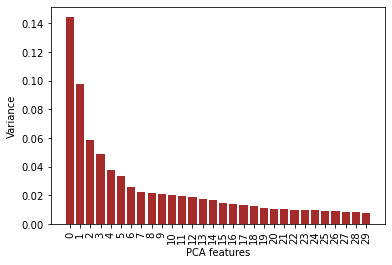

<IPython.core.display.Javascript object>

In [19]:
pca = PCA(n_components = 30)
principalComponents = pca.fit_transform(ai_sh_pivot)

features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color = 'brown')
plt.xlabel('PCA features')
plt.ylabel('Variance')
plt.xticks(features)
plt.xticks(rotation = 90)
plt.show()
PCA_components = pd.DataFrame(principalComponents)

<IPython.core.display.Javascript object>

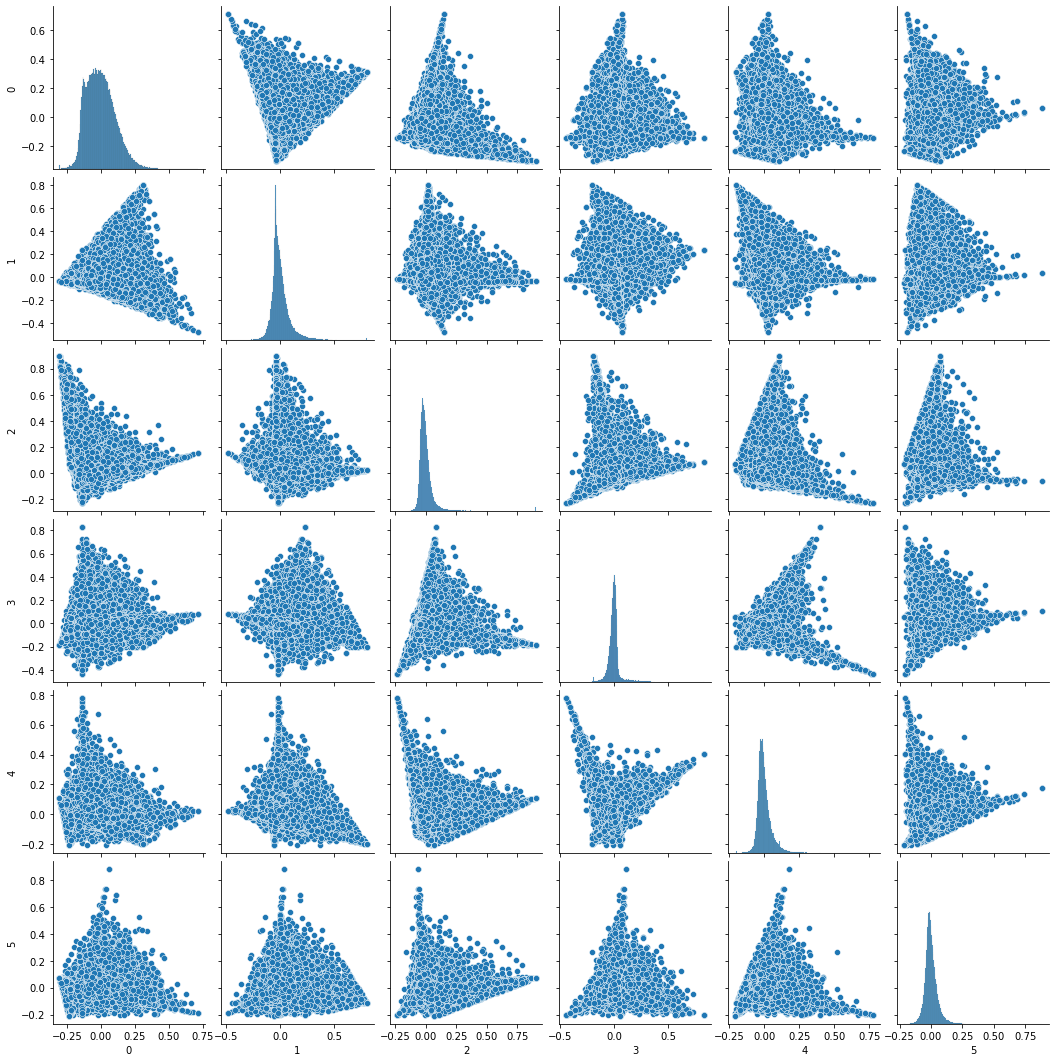

In [20]:
sns.pairplot(PCA_components[[0,1,2,3,4,5]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

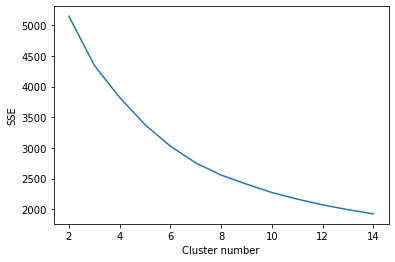

In [21]:
from sklearn.cluster import KMeans
sse= {}
labels = {}
for k in range(2,15):
    kmeans = KMeans(n_clusters = k).fit(PCA_components[[0,1,2,3,4,5]])
    sse[k] = kmeans.inertia_
    labels[k] = kmeans.labels_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Cluster number')
plt.ylabel('SSE')
plt.show()

In [22]:
cluster_df = pd.concat([PCA_components[[0,1,2,3,4,5]],pd.Series(labels[6]).rename('Cluster')],axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

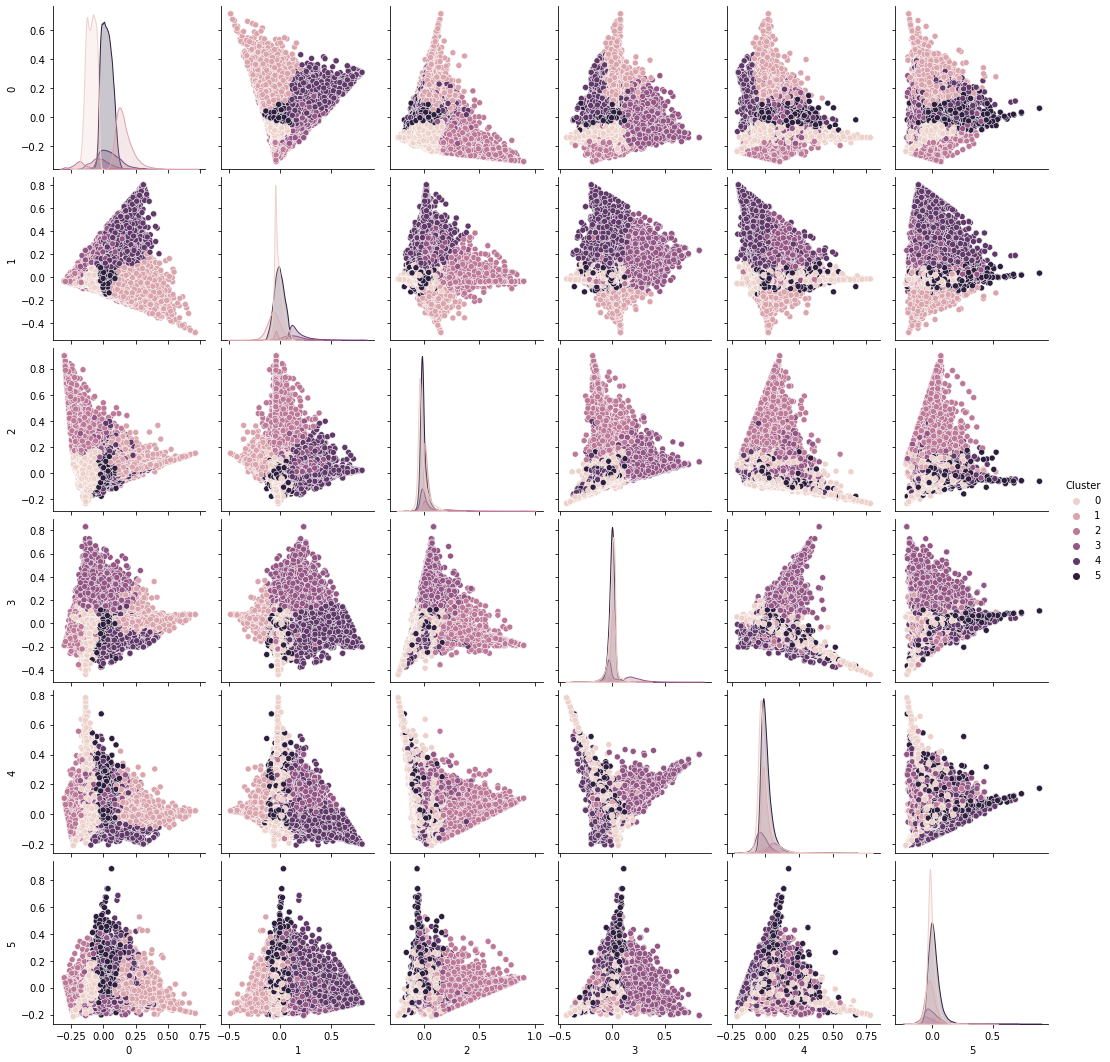

In [23]:
sns.pairplot(cluster_df,hue = 'Cluster')

prepping data for cluster analysis

In [24]:
cluster_df = pd.concat([pd.Series(ai_sh_pivot.index),cluster_df],axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
cluster_df.head()

,user_id,0,1,2,3,4,5,Cluster
0,1,-0.103161,0.048618,-0.031836,-0.005632,-0.053034,-0.055224,0
1,2,-0.077766,0.077983,-0.076149,-0.101673,0.081771,-0.040409,0
2,3,0.057496,0.085719,0.001780,-0.013188,-0.028489,0.113082,5
3,4,-0.055343,0.134731,-0.002394,-0.037708,-0.087812,-0.027377,4
4,5,0.133936,-0.019591,-0.020961,-0.003732,0.057730,0.138878,5


In [26]:
cluster_ai_br = ai.merge(cluster_df[['user_id','Cluster']],on = 'user_id')
cluster_ai_br = cluster_ai_br.rename(columns = {'aisle_shares':'user_aisle_share'})

In [27]:
ai = ai.merge(cluster_df[['user_id','Cluster']],on = 'user_id')
ai = ai.rename(columns = {'aisle_shares':'user_aisle_share'})


In [28]:
de = de.merge(cluster_df[['user_id','Cluster']],on = 'user_id')
de = de.rename(columns = {'department_shares':'user_dept_share'})

In [52]:
cluster_ai_br = pd.DataFrame(columns = ['aisle','add_to_cart_order','aisle_shares','Cluster'])
for i in range(0,6):
    x = ai[ai['Cluster'] == i]
    x = x.groupby('aisle')['add_to_cart_order'].sum().reset_index()
    x['aisle_shares'] = x['add_to_cart_order']
    x['aisle_shares'] = x['aisle_shares'].apply(lambda f: f / x['add_to_cart_order'].sum())
    x['Cluster'] = i
    cluster_ai_br = pd.concat([x,cluster_ai_br], axis = 0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
cluster_ai_br

,aisle,add_to_cart_order,aisle_shares,Cluster
0,air fresheners candles,52943,0.000378,5
1,asian foods,874671,0.006247,5
2,baby accessories,45060,0.000322,5
3,baby bath body care,48738,0.000348,5
4,baby food formula,2602562,0.018588,5
...,...,...,...,...
129,trash bags liners,154190,0.001850,0
130,vitamins supplements,126932,0.001523,0
131,water seltzer sparkling water,2025544,0.024298,0
132,white wines,118165,0.001417,0


In [31]:
ai

,user_id,aisle,add_to_cart_order,volume,user_aisle_share,Cluster
0,1,candy chocolate,8,280,0.028571,0
1,1,cereal,26,280,0.092857,0
2,1,cream,17,280,0.060714,0
3,1,fresh fruits,30,280,0.107143,0
4,1,milk,9,280,0.032143,0
...,...,...,...,...,...,...
5919835,206209,soft drinks,26,912,0.028509,0
5919836,206209,soy lactosefree,20,912,0.021930,0
5919837,206209,spices seasonings,9,912,0.009868,0
5919838,206209,trash bags liners,6,912,0.006579,0


In [32]:
t20 = list(ai.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:20].index)
t30 = list(ai.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:30].index)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Cluster', ylabel='aisle'>

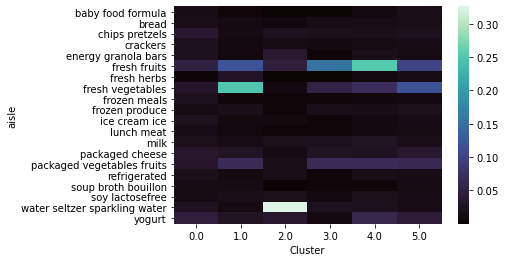

In [33]:
aisle_heat = cluster_ai_br[cluster_ai_br['aisle'].isin(t20)]
aisle_heat = aisle_heat.pivot(index = 'aisle',columns = 'Cluster',values = 'aisle_shares')
sns.heatmap(aisle_heat,cmap = "mako")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

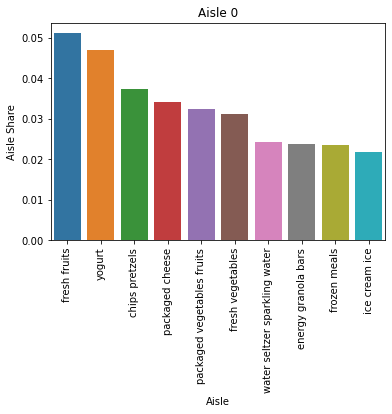

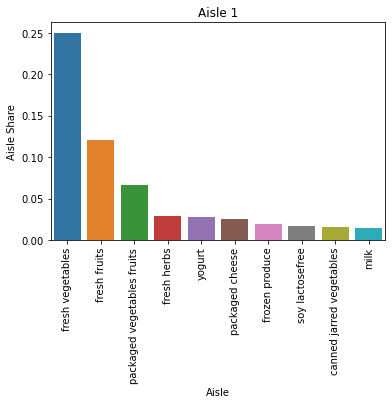

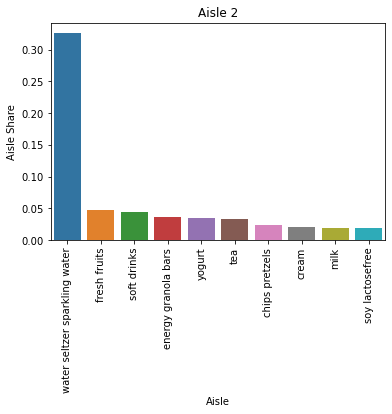

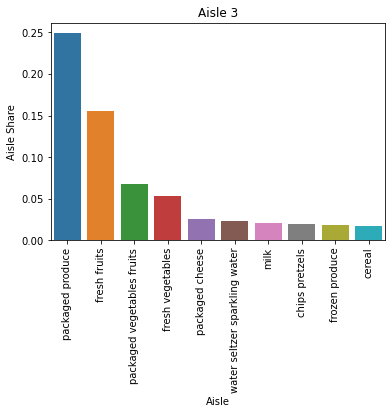

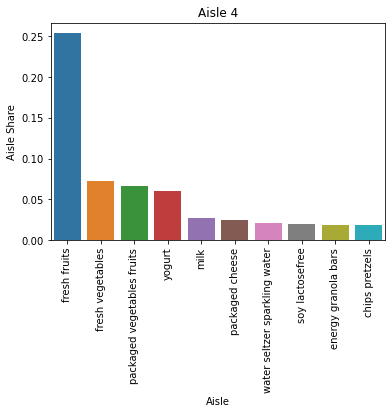

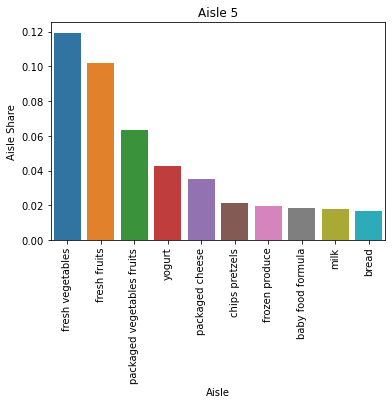

<Figure size 432x288 with 0 Axes>

In [34]:
for i in range(0,6):
    x = sns.barplot(data = cluster_ai_br[cluster_ai_br['Cluster'] ==i].sort_values('aisle_shares',ascending = False)[0:10],x = 'aisle',y = 'aisle_shares')
    x.set_xticklabels(x.get_xticklabels(),rotation = 90)
    plt.title('Aisle ' + str(i))
    x.set(xlabel = 'Aisle',ylabel = 'Aisle Share')
    plt.figure()

In [35]:
cluster_de_br = pd.DataFrame(columns = ['department','add_to_cart_order','dept_share','Cluster'])
for i in range(0,6):
    x = de[de['Cluster']==i]
    x = x.groupby('department')['add_to_cart_order'].sum().reset_index()
    x['dept_share'] =x['add_to_cart_order']
    x['dept_share']=x['dept_share'].apply(lambda f: f/x['add_to_cart_order'].sum())
    x['Cluster'] = i
    cluster_de_br = pd.concat([x,cluster_de_br],axis = 0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
cluster_de_br[cluster_de_br['Cluster'] == 5].dept_share.sum()

1.0

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Cluster', ylabel='department'>

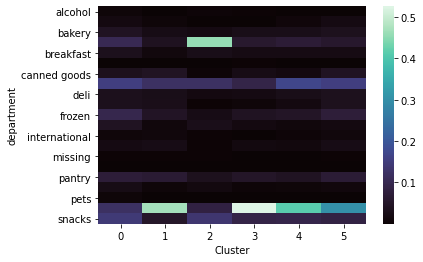

In [37]:
dept_heat = cluster_de_br.pivot(index = 'department', columns = 'Cluster', values = 'dept_share')
sns.heatmap(dept_heat,cmap="mako")

In [38]:
cluster_de_br

,department,add_to_cart_order,dept_share,Cluster
0,alcohol,211454,0.001510,5
1,babies,2778190,0.019842,5
2,bakery,4948680,0.035344,5
3,beverages,7837313,0.055974,5
4,breakfast,2990777,0.021360,5
...,...,...,...,...
16,pantry,5836428,0.070013,0
17,personal care,1943175,0.023310,0
18,pets,520841,0.006248,0
19,produce,10113861,0.121325,0


In [39]:
pd.DataFrame(cluster_df['Cluster'].value_counts().reset_index())

<IPython.core.display.Javascript object>

,index,Cluster
0,0,73132
1,5,72697
2,1,33157
3,4,15461
4,3,7956
5,2,3806


In [40]:
cluster_df['Cluster'].value_counts().sort_index() / cluster_df['Cluster'].value_counts().sum()*100

0    35.464989
1    16.079318
2     1.845700
3     3.858222
4     7.497733
5    35.254038
Name: Cluster, dtype: float64

In [41]:
cluster_ai_br.groupby('Cluster')['add_to_cart_order'].sum() / cluster_ai_br['add_to_cart_order'].sum()*100

Cluster
0.0    29.457606
1.0    16.221223
2.0     0.360971
3.0     0.785211
4.0     3.697571
5.0    49.477419
Name: add_to_cart_order, dtype: float64

In [42]:
x = pd.concat([cluster_df['Cluster'].value_counts().sort_index()/cluster_df['Cluster'].value_counts().sum()*100,
               cluster_ai_br.groupby('Cluster')['add_to_cart_order'].sum() / cluster_ai_br['add_to_cart_order'].sum() * 100], axis = 1)
x.rename(columns = {'Cluster':'user_share','add_to_cart_order':'Unit Purchase Share'})

<IPython.core.display.Javascript object>

,user_share,Unit Purchase Share
0.0,35.464989,29.457606
1.0,16.079318,16.221223
2.0,1.845700,0.360971
3.0,3.858222,0.785211
4.0,7.497733,3.697571
5.0,35.254038,49.477419


In [43]:
cluster_df.head()

,user_id,0,1,2,3,4,5,Cluster
0,1,-0.103161,0.048618,-0.031836,-0.005632,-0.053034,-0.055224,0
1,2,-0.077766,0.077983,-0.076149,-0.101673,0.081771,-0.040409,0
2,3,0.057496,0.085719,0.001780,-0.013188,-0.028489,0.113082,5
3,4,-0.055343,0.134731,-0.002394,-0.037708,-0.087812,-0.027377,4
4,5,0.133936,-0.019591,-0.020961,-0.003732,0.057730,0.138878,5


In [54]:
cluster_ai_br

,aisle,add_to_cart_order,aisle_shares,Cluster
0,air fresheners candles,52943,0.000378,5
1,asian foods,874671,0.006247,5
2,baby accessories,45060,0.000322,5
3,baby bath body care,48738,0.000348,5
4,baby food formula,2602562,0.018588,5
...,...,...,...,...
129,trash bags liners,154190,0.001850,0
130,vitamins supplements,126932,0.001523,0
131,water seltzer sparkling water,2025544,0.024298,0
132,white wines,118165,0.001417,0


In [45]:
full_orders = full_orders.merge(cluster_df[['user_id','Cluster']],on = 'user_id')

In [46]:
full_orders.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,user_id,Cluster
0,1107,1,7,0,61,19,cookies cakes,snacks,38259,5
1,2899757,8843,3,0,45,19,candy chocolate,snacks,38259,5
2,3369664,8843,4,1,45,19,candy chocolate,snacks,38259,5
3,3369664,39657,6,0,45,19,candy chocolate,snacks,38259,5
4,2899757,34551,13,0,17,13,baking ingredients,pantry,38259,5


In [48]:
cluster_df.to_csv('Data/cluster_dataset.csv')
full_orders.to_csv('Data/full_orders.csv')